In [6]:
import sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Tensorflow_RL')

Mounted at /content/drive


In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

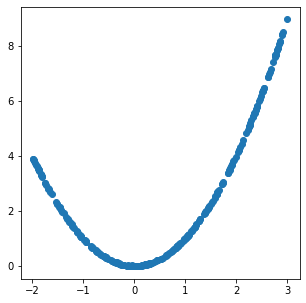

In [8]:
x_data = np.random.rand(300) * 5 - 2
noise = np.random.randn(300) * 1e-2
y_data = (x_data ** 2)[:, np.newaxis] + noise[:, np.newaxis]
x_data = x_data[:, np.newaxis] 

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x_data, y_data)
plt.show();

In [9]:
xs = tf.placeholder(shape=(None, 1), dtype=tf.float32)
ys = tf.placeholder(shape=(None, 1), dtype=tf.float32)

def add_layer(input, in_size, out_size, activation_func=None):

    Weights = tf.Variable(tf.random_normal(shape=(in_size, out_size)), dtype=tf.float32)
    bias = tf.Variable(tf.zeros(shape=(1, out_size)) + 0.1, dtype=tf.float32)

    Wx_plus_b = tf.add(tf.matmul(input, Weights), bias)

    if activation_func:
        return activation_func(Wx_plus_b)
    else:
        return Wx_plus_b


l1 = add_layer(xs, 1, 5, tf.nn.relu)
pred = add_layer(l1, 5, 1, None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(pred - ys), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(0.01).minimize(loss)

init = tf.global_variables_initializer()
lines = []

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1000):
        sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
        if epoch%50 == 0:
            y_pred = sess.run(pred, feed_dict={xs:np.linspace(-2,3,100).reshape(-1, 1)})
            lines.append([np.linspace(-2,3,100), y_pred.flatten()])

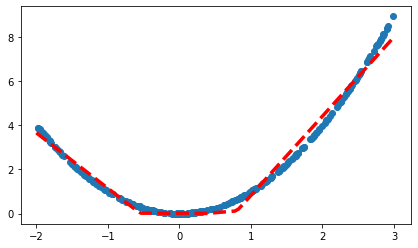

In [11]:
import matplotlib.animation as animation

def run(data):
    xs, ys = data
    line[0].set_data(xs, ys)
    return line

fig, ax = plt.subplots(1, 1, figsize=(7,4))
ax.scatter(x_data, y_data)
line = ax.plot([], [], linestyle='--', linewidth=3.5, color='r')


ani = animation.FuncAnimation(fig, run, lines, interval=1, blit=True)
ani.save("/content/drive/MyDrive/Colab Notebooks/Tensorflow_RL/tensorflow_l1/regression.gif", writer='pillow')
